In [1]:
import seaborn as sns

from sklearn import datasets
import matplotlib.pyplot as plt

faces = datasets.fetch_olivetti_faces()

In [ ]:
faces.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [ ]:
print(faces.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   =====================
    Classes    

In [ ]:
faces.images.shape

(400, 64, 64)

In [ ]:
faces.target.shape

(400,)

In [ ]:
faces.images[0].shape

(64, 64)

In [ ]:
faces.images[0].round(2)

array([[0.31, 0.37, 0.42, ..., 0.37, 0.33, 0.31],
       [0.34, 0.4 , 0.44, ..., 0.37, 0.34, 0.31],
       [0.34, 0.42, 0.45, ..., 0.38, 0.34, 0.3 ],
       ...,
       [0.21, 0.21, 0.22, ..., 0.15, 0.17, 0.17],
       [0.2 , 0.21, 0.21, ..., 0.15, 0.16, 0.17],
       [0.2 , 0.21, 0.2 , ..., 0.15, 0.16, 0.16]], dtype=float32)

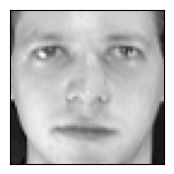

In [ ]:
import matplotlib.pyplot as plt

img = faces.images[0]
plt.figure(figsize=(2, 2))
plt.imshow(img, cmap=plt.cm.gray)
plt.tick_params(bottom=False, left=False, labelleft=False, labelbottom=False)
plt.show()

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

def visual_multi(i):
    '''Plots 15 faces, starting with digit i'''
    nplots = 50
    fig = plt.figure(figsize=(8, 5)) 
    
    for j in range(nplots):
        plt.subplot(5, 10, j+1)
        plt.imshow(faces.images[i+j], cmap=plt.cm.gray)
        plt.title(faces.target[i+j])
        plt.tick_params(bottom=False, left=False, labelleft=False, labelbottom=False)
    plt.show()

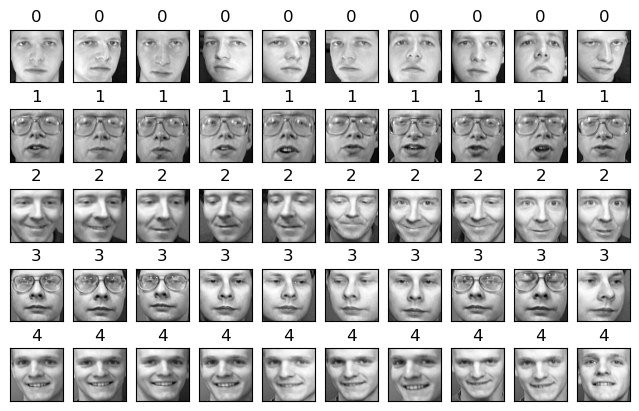

In [ ]:
visual_multi(0) 

In [ ]:
n_samples = len(faces.images) 
X = faces.images
y = faces.target
X = X.reshape(n_samples, -1)
X.shape, y.shape

((400, 4096), (400,))

In [ ]:
n_samples = 60
Xn = faces.images[:n_samples]

Xn.shape

(60, 64, 64)

In [ ]:
X = Xn.reshape(n_samples, -1)
X.shape

(60, 4096)

In [ ]:
y = faces.target[:n_samples]
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=2) # 
X_train.shape , X_test.shape

((45, 4096), (15, 4096))

In [ ]:
#train and test

In [ ]:
from sklearn import svm 
model = svm.SVC(gamma='scale') 

model.fit(X_train, y_train)

SVC()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred[:]

array([3, 0, 4, 5, 2, 4, 0, 2, 5, 3, 0, 3, 4, 2, 0])

In [ ]:
y_test[:]

array([3, 0, 4, 5, 2, 4, 3, 2, 4, 3, 0, 3, 4, 2, 0])

In [ ]:
from sklearn.metrics import accuracy_score # may use score of the model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# y_pred = model.predict(X_test)


print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
class_names =['Alex','Cala','Dana','Eva','Fox']  # 

print(classification_report(y_test, y_pred, target_names=class_names))

cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy Score: 0.8667
              precision    recall  f1-score   support

        Alex       0.75      1.00      0.86         3
        Cala       1.00      1.00      1.00         3
        Dana       1.00      0.75      0.86         4
         Eva       1.00      0.75      0.86         4
         Fox       0.50      1.00      0.67         1

    accuracy                           0.87        15
   macro avg       0.85      0.90      0.85        15
weighted avg       0.92      0.87      0.87        15

[[3 0 0 0 0]
 [0 3 0 0 0]
 [1 0 3 0 0]
 [0 0 0 3 1]
 [0 0 0 0 1]]


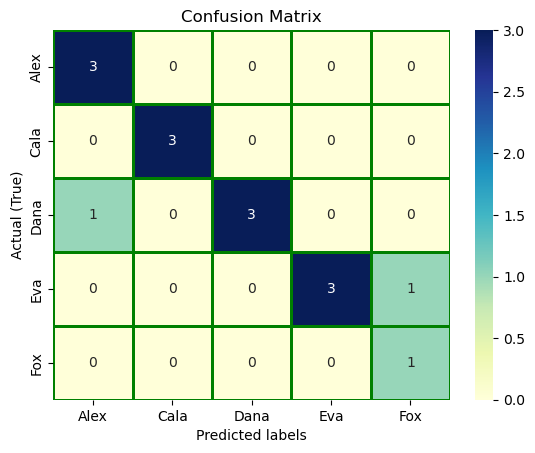

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, linewidths=1, linecolor='g', cmap="YlGnBu") #annot=True to annotate cells


ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual (True)'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(class_names)
ax.yaxis.set_ticklabels(class_names)
plt.show()

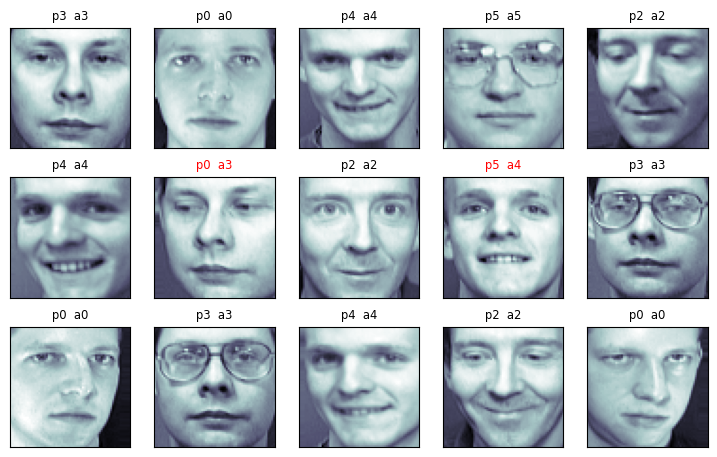

In [ ]:
import numpy as np

fig = plt.figure(figsize=(9, 5.5))
# y_pred = clf.predict(X_test)

for i in range(15): 
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i].reshape(faces.images[0].shape),
              cmap=plt.cm.bone)
    color = ('black' if y_pred[i] == y_test[i] else 'red')
    title = 'p{}  a{}' .format(y_pred[i] , y_test[i])
    ax.set_title(title ,  fontsize='small', color=color)


In [ ]:
import cv2
cv2.__version__

'4.9.0'

In [ ]:
img = cv2.imread('test.jpg') 

print(img.shape) 

cv2.imshow('image', img) 
cv2.waitKey(0)
cv2.destroyAllWindows()

(120, 160, 3)


In [ ]:
img = cv2.imread('test.jpg',0)

In [ ]:
img = cv2.imread('test.jpg',cv2.IMREAD_GRAYSCALE)

In [ ]:
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
img = cv2.imread('test.jpg')

if img is not None:
    if len(img.shape) == 2:
        # Grayscale image
        blue = green = red = img
    elif len(img.shape) == 3:
        # Color image
        blue = img[:,:,0]
        green = img[:,:,1]
        red = img[:,:,2]

    # Continue with your processing or analysis
else:
    print("Error: Image not loaded.")

In [ ]:
cv2.imshow('image', red) 
#cv2.imshow('image',blue)
#cv2.imshow('image', green) 
k = cv2.waitKey(0)
cv2.destroyAllWindows()

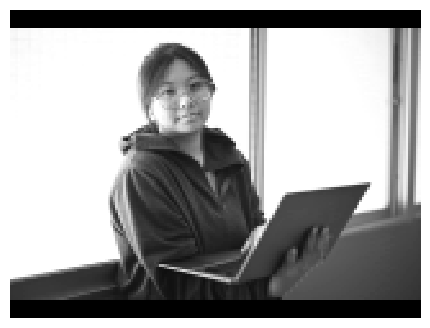

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))

plt.imshow(red, cmap='gray',interpolation='none')
plt.axis('off')
plt.show()

In [ ]:
import cv2
source = 0
cap = cv2.VideoCapture(source)

if cap is None or not cap.isOpened():
    print('could not open vdo source: ',source)
else:
    print('vdo source OK ->',source)
    cap.release()

vdo source OK -> 0


In [ ]:
import cv2 
   
cap = cv2.VideoCapture(0) 
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 320) 
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 240)

if (cap.isOpened()== False):  
    print("Could not open the VDO file") 

frame_counter = 0    
while(cap.isOpened()): 
    ret, frame = cap.read() 

    if ret == True: 
        frame_counter += 1
        cv2.imshow('Mywindow', frame) 
        if cv2.waitKey(3) & 0xFF == 27: 
            break
   
    else:  # if ret true
        break
   

cap.release()  
cv2.destroyAllWindows() 

In [ ]:
import cv2

scale = 0.7
image_file = 'test.jpg'

casc_file = 'haarcascade_frontalface_default.xml'
# casc_file = 'lbpcascade_frontalface.xml'


frontal_face = cv2.CascadeClassifier(casc_file)


image = cv2.imread(image_file)
image = cv2.resize(image, None,fx=scale,fy=scale,
                   interpolation=cv2.INTER_AREA)
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

bBoxes = frontal_face.detectMultiScale(
    gray_img, scaleFactor=1.3, minNeighbors=5,
    minSize=(30, 30),
)

print("Found {} faces".format(len(bBoxes)))

for (x, y, w, h) in bBoxes:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)  

cv2.imshow("MyWin", image)

cv2.waitKey(0)
cv2.destroyAllWindows()

Found 0 faces


In [ ]:
import cv2 
   
cap = cv2.VideoCapture(0) 
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 320) 
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 240)

casc_file = 'haarcascade_frontalface_default.xml'
# casc_file = 'lbpcascade_frontalface.xml'


frontal_face = cv2.CascadeClassifier(casc_file)

if (cap.isOpened()== False):  
    print("Could not open the VDO file") 

while(cap.isOpened()): 

    ret, frame = cap.read() 

    if ret == True: 
        gray_img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        # Detect faces in the image
        bBoxes = frontal_face.detectMultiScale(gray_img, 
                                scaleFactor=1.3, minNeighbors=5, minSize=(30, 30)
                                           )
       
        for (x, y, w, h) in bBoxes:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2) 

        cv2.imshow('MyWin', frame) 
        if cv2.waitKey(10) & 0xFF == 27: 
            break
   
  
    else:  # if ret true
        break
   

cap.release() 
cv2.destroyAllWindows()

In [ ]:
import cv2
from os import listdir
import time

img_pixel = 96 


input_path= "img_people/"
output_path= "img_features/"

# see workshop 9
casc_file = "haarcascade_frontalface_default.xml"
# casc_file = "lbpcascade_frontalface.xml"

def cropImage(img, box, fname):
    [p, q, r, s] = box
    write_img_color= img[q:q+ s, p:p+ r]
    saveCropped(write_img_color, fname)

def saveCropped(img, fname):
    img = cv2.resize(img,(img_pixel,img_pixel),interpolation=cv2.INTER_AREA)
    cv2.imwrite(output_path + fname, img)

if __name__== "__main__":
    frontal_face= cv2.CascadeClassifier(casc_file)
    input_files= listdir("./"+ input_path)

    print("Starting to detect faces and save the cropped images...")
    sttime = time.time() 
    for i, fname in enumerate(input_files):
        print(input_path + fname)
        color_img= cv2.imread(input_path + fname)

        gray_img= cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)


        bBoxes= frontal_face.detectMultiScale(gray_img, scaleFactor=1.3, 
                                              minNeighbors=5, 
                                              minSize=(30, 30),
#                                               flags = cv.CV_HAAR_SCALE_IMAGE
                                             )

        for box in bBoxes:
            cropImage(gray_img, box, fname)

    print("Finished {} imgs in {:.2f} Secs." .format(i+1 , (time.time() - sttime)))  

Starting to detect faces and save the cropped images...
img_people/test.jpg
img_people/Photo on 16-1-2567 BE at 01.55 #2.jpg
Finished 2 imgs in 0.03 Secs.


In [2]:
train_path = './img_features_labels/'
input_path = './'
label_file = './labels.csv' 

casc_file = "haarcascade_frontalface_default.xml"
# casc_file = 'lbpcascade_frontalface.xml'

import cv2  
import numpy as np
import os, sys, time
import pandas as pd

img_pixel = (96, 96) 

def save_labels(people):
    df = pd.DataFrame(people, columns=['name'])
    df.to_csv(label_file)
    print('Saved labels..')
    print(people)

def get_images(path, size):
    class_id = 0  # target or class of the face
    images, labels= [], []
    people= []

def get_images(path, size):
    class_id = 0  # target or class of the face
    images, labels, people = [], [], []

    for subdir in os.listdir(path):
        subdir_path = os.path.join(path, subdir)

        # Skip over non-directories
        if not os.path.isdir(subdir_path):
            continue

        for image in os.listdir(subdir_path):
            # Skip over system files like '.DS_Store'
            if image.startswith('.'):
                continue

            img_path = os.path.join(subdir_path, image)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

            if img is not None and not img.size == 0:
                img = cv2.resize(img, size)
                images.append(np.asarray(img, dtype=np.uint8))
                labels.append(class_id)
            else:
                print(f"Skipped empty or invalid image: {img_path}")

        people.append(subdir)
        class_id += 1

    return [images, labels, people]


def train_model(path):
    [images, labels, people] = get_images(train_path, img_pixel) # ksb


    labels = np.asarray(labels, dtype= np.int32)
    print('Total trained images: {}'.format(len(labels)))
    print('Total classes : {}'.format(len(people)))

    # initializing eigen_model and training
    print("\nInitializing FaceRecognizer and training...")
    sttime= time.time()
    eigen_model= cv2.face.EigenFaceRecognizer_create()
    #face_model= cv2.face.LBPHFaceRecognizer_create()
    #face_model.train(images, labels)

    print("\nCompleted training in {:.2f} s.\n" .format(time.time()- sttime))

    return [eigen_model, people]    

if __name__ == "__main__":
    face_model, people = train_model(train_path) 
    face_model.write('facemodel.yml')
    print('Saved model...')
    save_labels(people)


Skipped empty or invalid image: ./img_features_labels/Tana_ICE/IMG_4029.jpg
Skipped empty or invalid image: ./img_features_labels/Tana_ICE/IMG_4028.jpg
Skipped empty or invalid image: ./img_features_labels/Tana_ICE/IMG_4026.jpg
Skipped empty or invalid image: ./img_features_labels/Tana_ICE/IMG_4027.jpg
Skipped empty or invalid image: ./img_features_labels/Tana_ICE/IMG_4031.jpg
Skipped empty or invalid image: ./img_features_labels/Tana_ICE/IMG_4030.jpg
Skipped empty or invalid image: ./img_features_labels/Tana_ICE/IMG_4024.jpg
Skipped empty or invalid image: ./img_features_labels/Tana_ICE/IMG_4021.jpg
Skipped empty or invalid image: ./img_features_labels/Tana_ICE/IMG_4023.jpg
Skipped empty or invalid image: ./img_features_labels/Tana_ICE/IMG_4022.jpg
Total trained images: 0
Total classes : 1

Initializing FaceRecognizer and training...

Completed training in 0.00 s.

Saved model...
Saved labels..
['Tana_ICE']


In [3]:
pd.DataFrame(people)

,0
0,Tana_ICE


In [4]:
# face_model = cv2.face.EigenFaceRecognizer_create()
face_model = cv2.face.LBPHFaceRecognizer_create()
# face_model.read('facemodel.xml')
face_model.read('facemodel.yml')

image_file = 'test.jpg'

feature_size = (96, 96) 

label_file = './labels.csv'
df = pd.read_csv(label_file)
y_label = df.name


def detect_faces(image):
#     casc_file = "lbpcascade_frontalface.xml"
    casc_file = "haarcascade_frontalface_default.xml"
    frontal_face= cv2.CascadeClassifier(casc_file)
    bBoxes= frontal_face.detectMultiScale(image, scaleFactor=1.2, 
        minNeighbors=5, minSize=(30, 30)  
                        )
    return bBoxes

color_image = cv2.imread(image_file)
dimensions = color_image.shape
print(dimensions)
img_resize_factor = 800 / dimensions[1] 

color_image = cv2.resize(color_image, None,fx=img_resize_factor,
               fy=img_resize_factor,interpolation=cv2.INTER_AREA)
    
gray_frame = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)

bBoxes = detect_faces(gray_frame)

for bBox in bBoxes:
    (p,q,r,s)= bBox
    cv2.rectangle(color_image, (p,q), (p+r,q+s), (25,255,25), 2)


    crop_image = gray_frame[q:q+s, p:p+r]

    crop_image = cv2.resize(crop_image, feature_size) # ksb



    [pred_label, pred_conf] = face_model.predict(crop_image)
    print("Predicted person: {:8}".format(y_label[pred_label]))


    box_bg = (0, 255, 0)
    box_bg = (0, 180, 0)
    cv2.rectangle(color_image, (p,q), (p+95,q-22), box_bg, cv2.FILLED)
    

    box_text= y_label[pred_label][:7]
    txt_color = (255,255,255)
    cv2.putText(color_image, box_text, (p+4, q-4), 
                cv2.FONT_HERSHEY_PLAIN, 1.3, txt_color, 2)
    
    
cv2.imwrite('pred_imgb.jpg', color_image, [int(cv2.IMWRITE_JPEG_QUALITY), 100])
cv2.imshow("Win", color_image )
cv2.waitKey(0)
cv2.destroyAllWindows() 


scale = 0.5  
feature_size = (96, 96) 


label_file = './labels.csv'
df = pd.read_csv(label_file)
y_label = df.name

casc_file = "haarcascade_frontalface_default.xml"
# casc_file = 'lbpcascade_frontalface.xml'
frontal_face = cv2.CascadeClassifier(casc_file) 

faces = []

cap = cv2.VideoCapture('test.mp4')  
# cap.set(3, 640) 
# cap.set(4, 420) 


if (cap.isOpened()== False):  
    print("Could not open the VDO file") 


def detect_faces(image):
    bBoxes = frontal_face.detectMultiScale(image, scaleFactor=1.3, 
        minNeighbors=5, minSize=(30, 30))  # ,flags = cv.CV_HAAR_SCALE_IMAGE
    return bBoxes    

frame_counter = 0
while(cap.isOpened()): 

    ret, frame = cap.read() 

    if ret == True: 
        color_image = frame
        frame_counter += 1
        # if block below is not used with CAM
        if frame_counter >= cap.get(cv2.CAP_PROP_FRAME_COUNT):
            frame_counter = 0 # 
            cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
           
        color_image = cv2.resize(color_image, None,fx=scale,fy=scale,
                                 interpolation=cv2.INTER_AREA)
        gray_frame = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)


        bBoxes = detect_faces(gray_frame)
        for bBox in bBoxes:
            (p,q,r,s)= bBox
            cv2.rectangle(color_image, (p,q), (p+r,q+s), (25,255,25), 2)
            
            crop_image = gray_frame[q:q+s, p:p+r]
            crop_image = cv2.resize(crop_image, feature_size) # ksb

            [pred_label, pred_conf]= face_model.predict(crop_image)

            box_bg = (0, 255, 0)
            cv2.rectangle(color_image, (p,q), (p+95,q-22), box_bg, cv2.FILLED)

            box_text= y_label[pred_label][:7]
            txt_color = (100,0,215)
            cv2.putText(color_image, box_text, (p+4, q-4), 
                        cv2.FONT_HERSHEY_PLAIN, 1.3, txt_color, 2)

            cv2.imshow('Mywindow', color_image) 

        if cv2.waitKey(6) & 0xFF == 27:   # wait 200 is ok for Cam
            break
   
    else:  # if ret true
        break
   
cap.release() 
cv2.destroyAllWindows()
    